In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
# iris 데이터셋 로드
iris = load_iris()

In [4]:
print(iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
data = iris['data']
data[-5:]
feature_names = iris['feature_names']
feature_names
target = iris['target']
target[:5]
# 타겟 값의 레이블(이름)
iris['target_names']   
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df_iris['target'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


EDA & 시각화

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

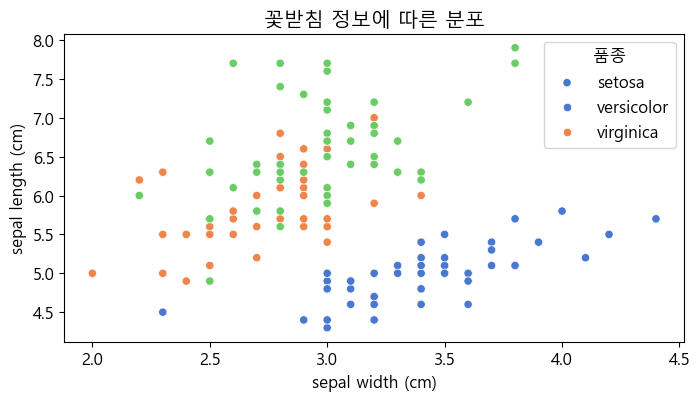

In [8]:
sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='muted')
plt.legend(title='품종', loc='upper right', labels=iris.target_names)
plt.title('꽃받침 정보에 따른 분포')
plt.show()

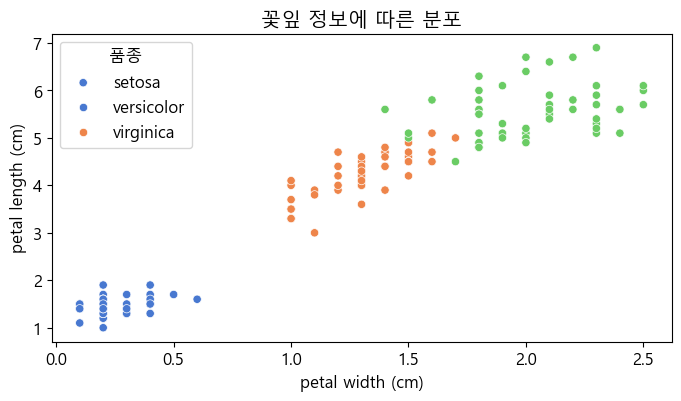

In [9]:
sns.scatterplot(data=df_iris, x='petal width (cm)', y='petal length (cm)', hue='target', palette='muted')
plt.legend(title='품종', loc='upper left', labels=iris.target_names)
plt.title('꽃잎 정보에 따른 분포')
plt.show()

## 데이터 불균형 확인

label의 클래스의 분포를 균등하게 배분함. 샘플을 균등하게 하지 않으면 편향된 예측을 할 수 있음.
stratify = feature column

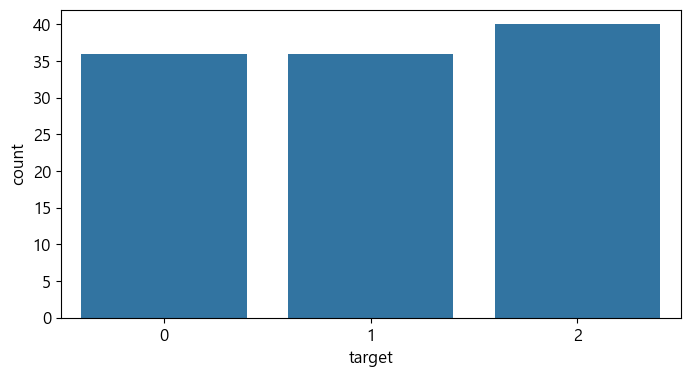

In [13]:
from sklearn.model_selection import train_test_split

X = df_iris.drop('target', axis=1)
y = df_iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sns.countplot(x= y_train)
plt.show()

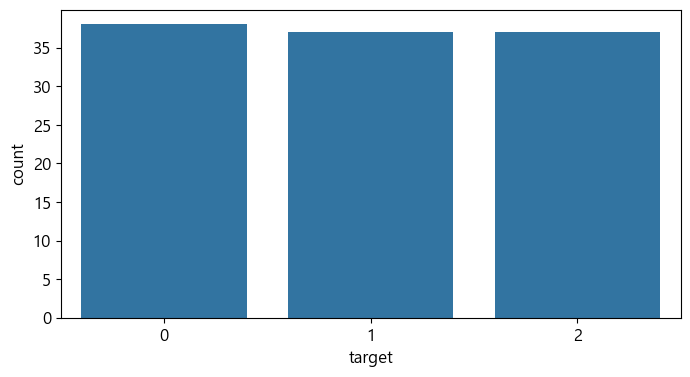

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)
sns.countplot(x = y_train)
plt.show()

## 로지스틱 회귀


In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
model_lr = LogisticRegression(max_iter=500)

In [18]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [19]:
pred_lr = model_lr.predict(X_test)

In [20]:
pred_lr[:5]
y_test[:5]

74     1
90     1
146    2
125    2
144    2
Name: target, dtype: int64

In [21]:
(pred_lr == y_test).mean()

np.float64(1.0)

In [22]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [23]:
# 공식문서 예제
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X_test[:4]))
print(clf.predict_proba(X_test[:4]))  # 확률값
print(clf.score(X_test, y_test))  # 정확도

[1 1 2 2]
[[9.93439951e-03 9.28964653e-01 6.11009474e-02]
 [1.60735054e-02 8.51174633e-01 1.32751861e-01]
 [4.96250130e-04 2.95474039e-01 7.04029711e-01]
 [1.13922688e-05 7.41230735e-02 9.25865534e-01]]
1.0


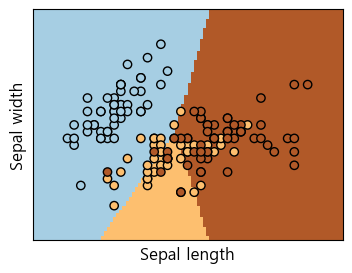

In [24]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=0.000002)
# logreg = LogisticRegression(C=100000)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()